In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [57]:
# Importing dataset
dataset = pd.read_csv("./Dataset/House_Rent_Dataset.csv")
dataset.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
# Checking if the dataset has null values
dataset.isna().any()

Posted On            False
BHK                  False
Rent                 False
Size                 False
Floor                False
Area Type            False
Area Locality        False
City                 False
Furnishing Status    False
Tenant Preferred     False
Bathroom             False
Point of Contact     False
dtype: bool

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
# Changing the Posted on categorical into different category
# Since the date posted consists of year, month and day, it can be divided into year, month and day column
dataset["Day"] = dataset["Posted On"].str.split('-',expand=True)[2].astype(int)
dataset["Month"] = dataset["Posted On"].str.split('-',expand=True)[1].astype(int)
dataset["Year"] = dataset["Posted On"].str.split('-',expand=True)[0].astype(int)

#Removing the Posted On column
dataset.drop("Posted On",axis=1,inplace=True)

In [6]:
dataset["Year"].value_counts()

2022    4746
Name: Year, dtype: int64

In [7]:
# Since, there consists data of only 2022 year, year column can be dropped
dataset.drop("Year", axis=1, inplace=True)

In [8]:
dataset.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Day,Month
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,18,5
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,13,5
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,16,5
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,4,7
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,9,5


In [9]:
# Cheecking categorical and numerical columns
print(f"Categorical Columns: \n{dataset.select_dtypes(include=object).columns.to_list()}")
print(f"\nNumerical Columns: \n{dataset.select_dtypes(include=np.number).columns.to_list()}")

Categorical Columns: 
['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']

Numerical Columns: 
['BHK', 'Rent', 'Size', 'Bathroom', 'Day', 'Month']


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Floor              4746 non-null   object
 4   Area Type          4746 non-null   object
 5   Area Locality      4746 non-null   object
 6   City               4746 non-null   object
 7   Furnishing Status  4746 non-null   object
 8   Tenant Preferred   4746 non-null   object
 9   Bathroom           4746 non-null   int64 
 10  Point of Contact   4746 non-null   object
 11  Day                4746 non-null   int32 
 12  Month              4746 non-null   int32 
dtypes: int32(2), int64(4), object(7)
memory usage: 445.1+ KB


## Visualization of Data

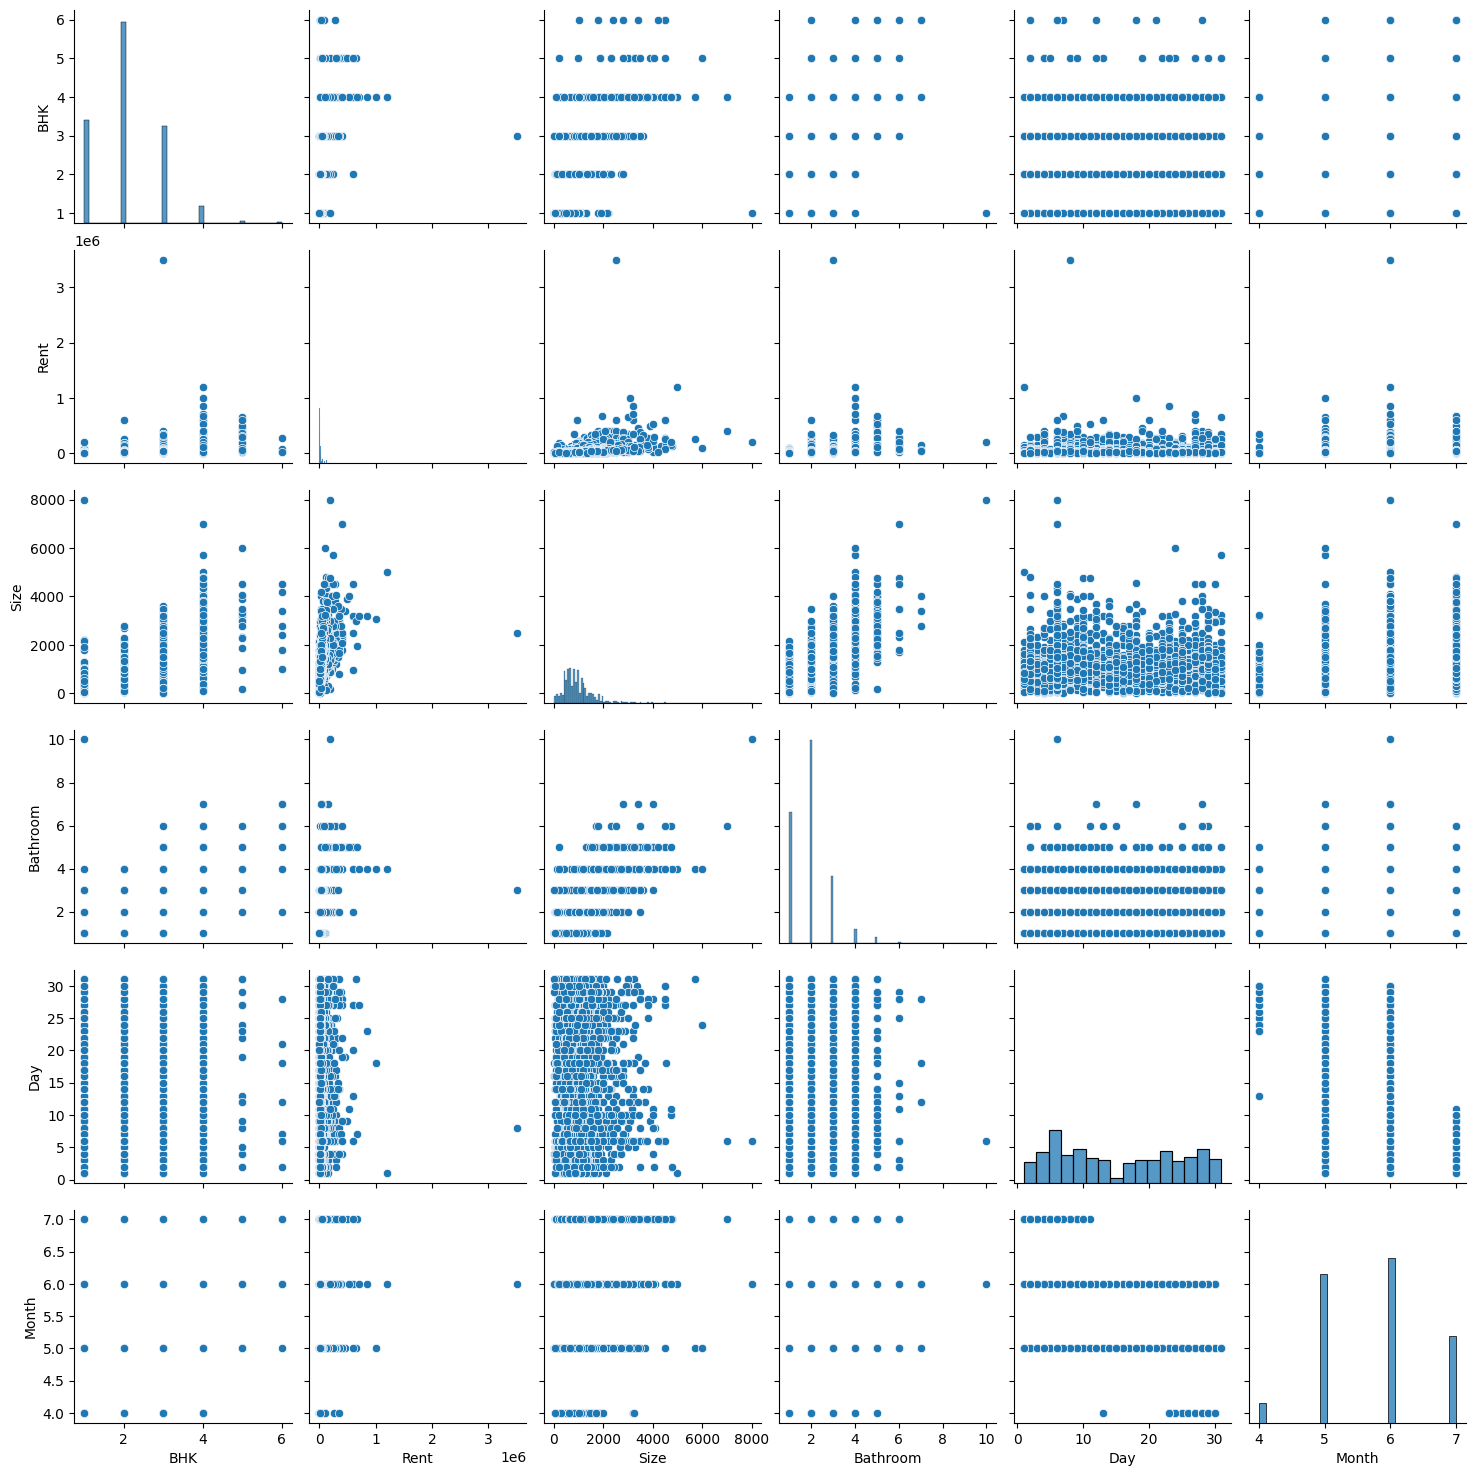

In [11]:
sns.pairplot(dataset)

## Univariate Analysis

In [12]:
# Descriptive statistics of the categorical column
def categorical_data_description(category: str, data:pd.DataFrame=dataset) -> None: 
    print("--------------------------------------------------------")
    print(f"Unique values in column: {category} \n {dataset[category].unique()}")
    print("--------------------------------------------------------")
    print(f"Value Counts in column: {category} \n {dataset[category].value_counts()}")
    print("--------------------------------------------------------")

In [13]:
# Descriptive statistics of the numeric column
def numerical_data_description(category: str) -> None: 
    print("--------------------------------------------------------")
    print(f"Descriptive information of {category}: \n{dataset[category].describe()}")
    print("--------------------------------------------------------")

In [14]:
# Count plot that can be plotted for categorical data
def count_plot(category: str, horizontal: bool=False, dataset: pd.DataFrame=dataset) -> None:
    # Plotting the count plot horizontally in case the naming doesn't fit in x-axis
    if horizontal:
        sns.countplot(data=dataset, y=dataset[category])

    else:
        sns.countplot(data=dataset, x=dataset[category])
    

    plt.title(f"Count Plot of {category}")
    plt.show()

In [15]:
#Visualization of continuous data
def histogram_plot(category: str, dataset: pd.DataFrame=dataset) -> None:
    # plt.figure(figsize=(8,6))
    plt.title(f"Histogram of {category}")
    sns.histplot(data=dataset, x=dataset[category], kde=True)
    plt.plot()

In [16]:
def univariate_viz_with_desc(category:str, dataset: pd.DataFrame=dataset, viz_orient: bool=False):
    categorical_columns = dataset.select_dtypes(include="object")
    numeric_columns = dataset.select_dtypes(include=np.number)
    
    if category in categorical_columns:
        categorical_data_description(category)
        count_plot(category, viz_orient)  
    elif category in numeric_columns:
        numerical_data_description(category)
        histogram_plot(category)
    else:
        print("No such category in dataset. Check spelling or the dataset.")

### Numerical column visualization

--------------------------------------------------------
Descriptive information of Day: 
count    4746.000000
mean       15.479562
std         9.148678
min         1.000000
25%         7.000000
50%        14.000000
75%        23.000000
max        31.000000
Name: Day, dtype: float64
--------------------------------------------------------


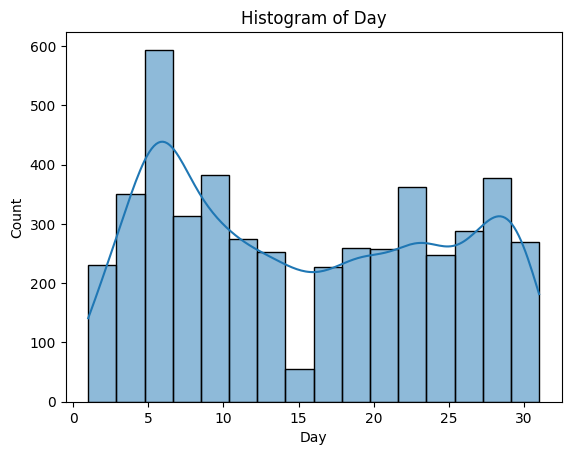

In [17]:
univariate_viz_with_desc(dataset=dataset, category="Day")

--------------------------------------------------------
Descriptive information of Month: 
count    4746.000000
mean        5.755794
std         0.832426
min         4.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         7.000000
Name: Month, dtype: float64
--------------------------------------------------------


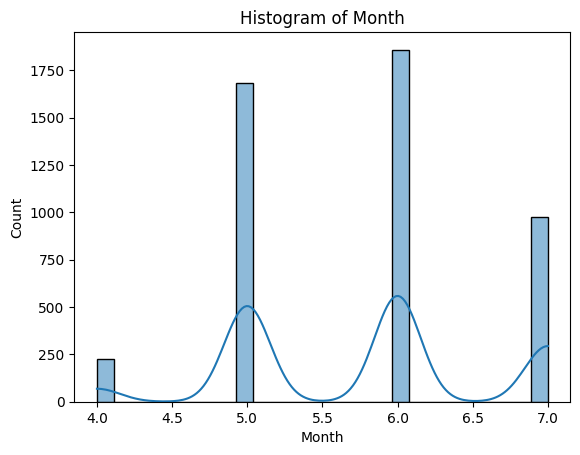

In [18]:
univariate_viz_with_desc(dataset=dataset, category="Month")

--------------------------------------------------------
Descriptive information of BHK: 
count    4746.000000
mean        2.083860
std         0.832256
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: BHK, dtype: float64
--------------------------------------------------------


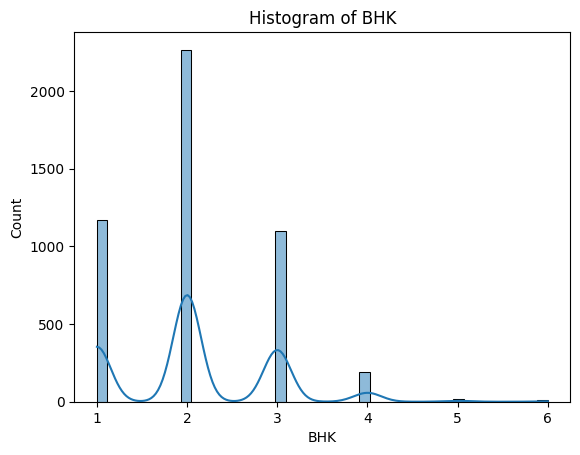

In [19]:
univariate_viz_with_desc(dataset=dataset, category="BHK")

--------------------------------------------------------
Descriptive information of Size: 
count    4746.000000
mean      967.490729
std       634.202328
min        10.000000
25%       550.000000
50%       850.000000
75%      1200.000000
max      8000.000000
Name: Size, dtype: float64
--------------------------------------------------------


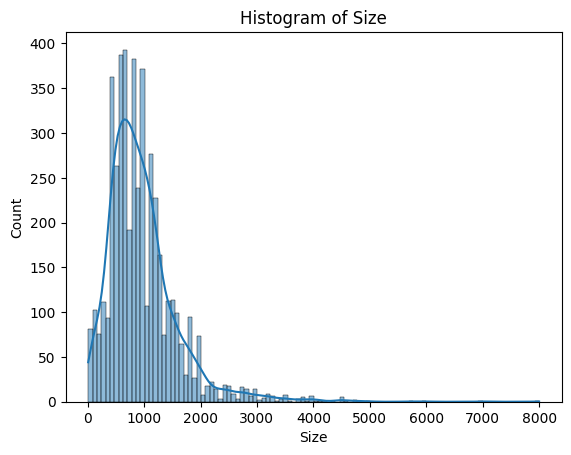

In [20]:
univariate_viz_with_desc(dataset=dataset, category="Size")

--------------------------------------------------------
Descriptive information of Rent: 
count    4.746000e+03
mean     3.499345e+04
std      7.810641e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64
--------------------------------------------------------


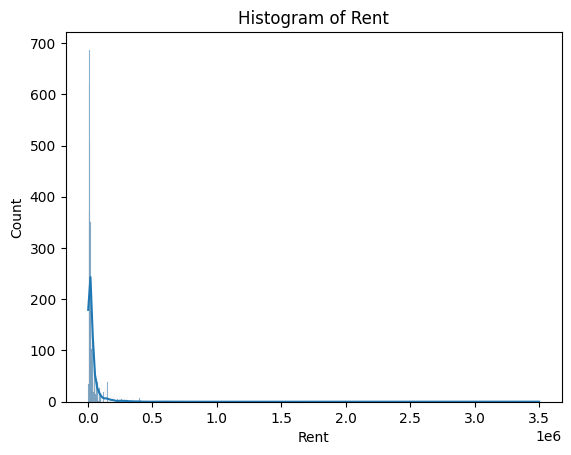

In [21]:
univariate_viz_with_desc(dataset=dataset, category="Rent")

### Categorical column visualization

In [22]:
print(dataset["Floor"].value_counts())

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64


--------------------------------------------------------
Unique values in column: Area Type 
 ['Super Area' 'Carpet Area' 'Built Area']
--------------------------------------------------------
Value Counts in column: Area Type 
 Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64
--------------------------------------------------------


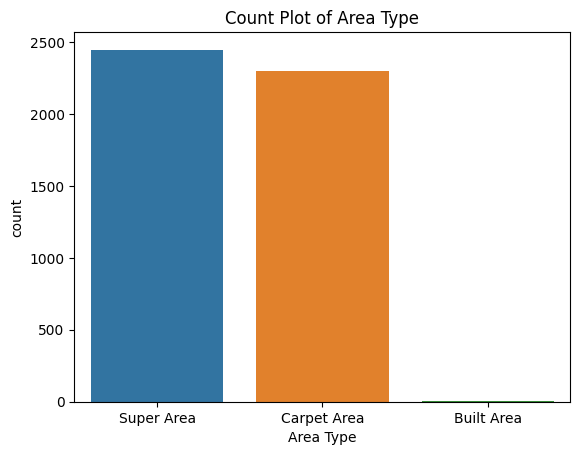

In [23]:
univariate_viz_with_desc(dataset=dataset, category="Area Type")

In [24]:
print(dataset["Area Locality"].value_counts())

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64


--------------------------------------------------------
Unique values in column: City 
 ['Kolkata' 'Mumbai' 'Bangalore' 'Delhi' 'Chennai' 'Hyderabad']
--------------------------------------------------------
Value Counts in column: City 
 Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64
--------------------------------------------------------


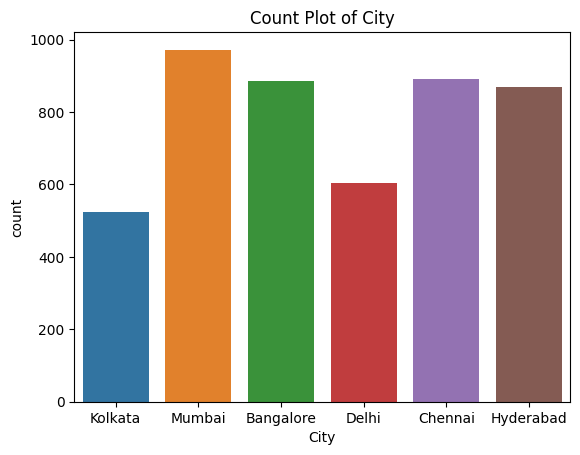

In [25]:
univariate_viz_with_desc(dataset=dataset, category="City")

--------------------------------------------------------
Unique values in column: Furnishing Status 
 ['Unfurnished' 'Semi-Furnished' 'Furnished']
--------------------------------------------------------
Value Counts in column: Furnishing Status 
 Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64
--------------------------------------------------------


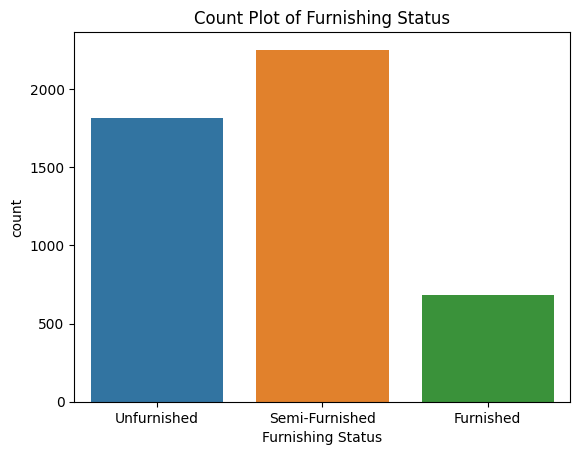

In [26]:
univariate_viz_with_desc(dataset=dataset, category="Furnishing Status")

--------------------------------------------------------
Unique values in column: Tenant Preferred 
 ['Bachelors/Family' 'Bachelors' 'Family']
--------------------------------------------------------
Value Counts in column: Tenant Preferred 
 Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64
--------------------------------------------------------


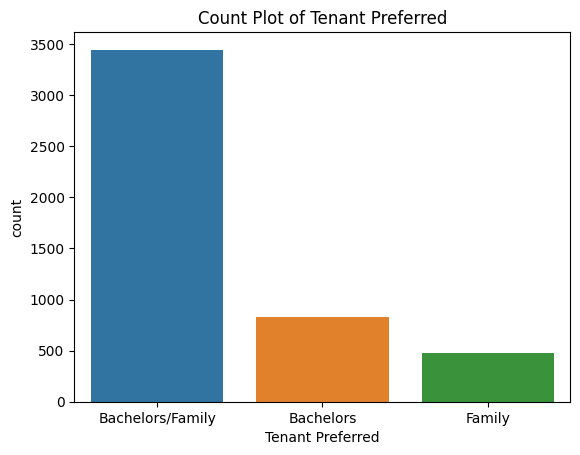

In [27]:
univariate_viz_with_desc(dataset=dataset, category="Tenant Preferred")

--------------------------------------------------------
Unique values in column: Point of Contact 
 ['Contact Owner' 'Contact Agent' 'Contact Builder']
--------------------------------------------------------
Value Counts in column: Point of Contact 
 Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64
--------------------------------------------------------


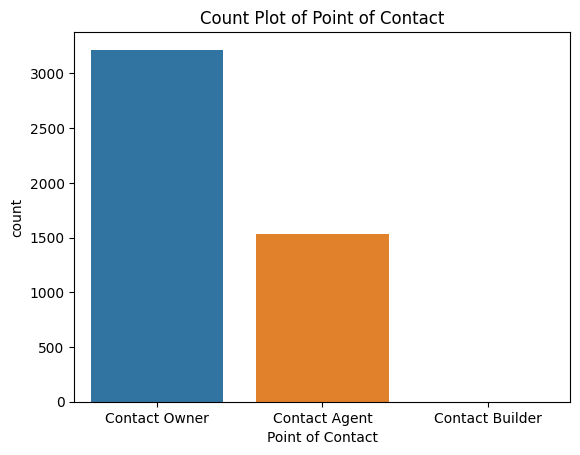

In [28]:
univariate_viz_with_desc(dataset=dataset, category="Point of Contact")

The dependent variable is Rent. So, analysis the data collectively with Rent.

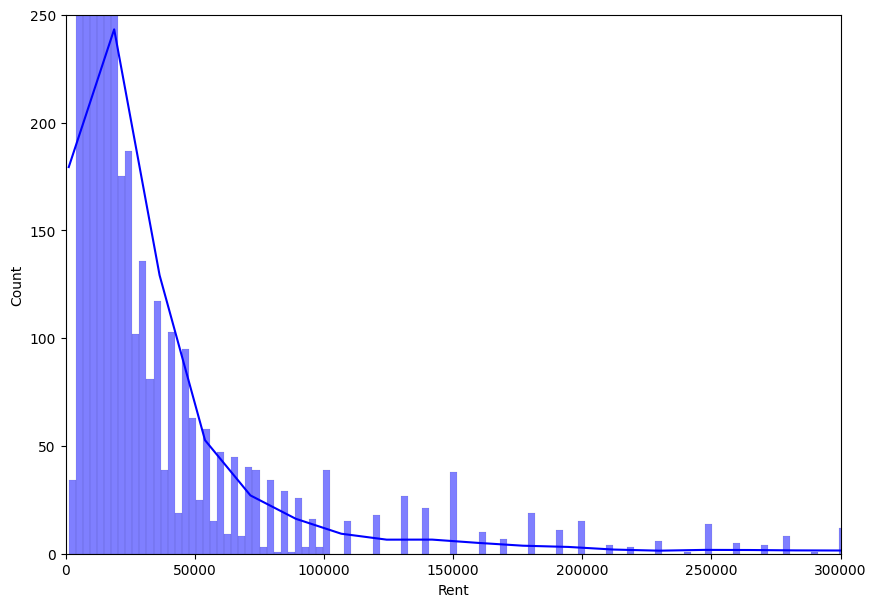

In [29]:
# Analysis Rent
plt.figure(figsize=(10,7))
sns.histplot(dataset["Rent"], color="blue", kde=True)
plt.xlim(0,300000)
plt.ylim(0,250)
plt.show()

c:\Users\LEGION\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


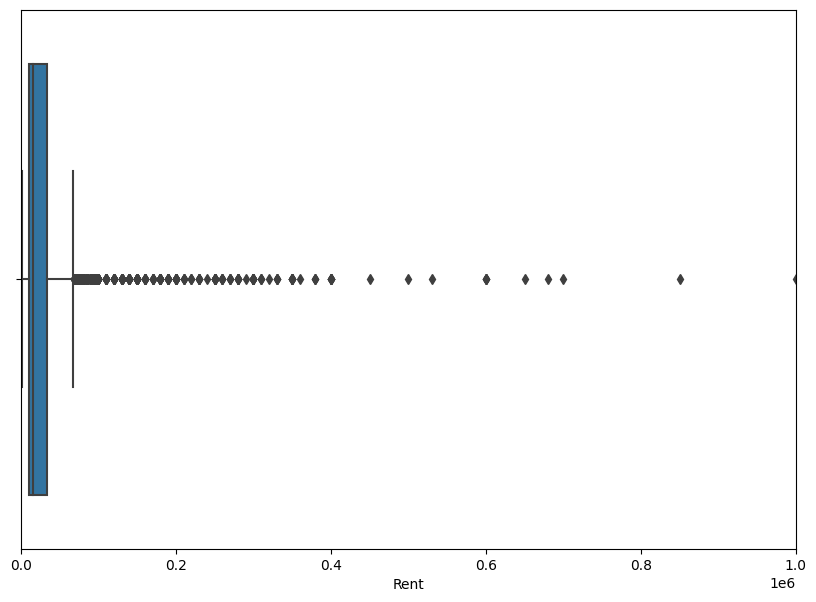

In [30]:
plt.figure(figsize=(10,7))
sns.boxplot(dataset["Rent"])
plt.xlim(0,1000000)
plt.show()

## Test for the assumption made for linear regression
* Correlation Test
* Muliticollinearity Test

### Correlation Test

In [31]:
# correlation between numerical columns
numerical_columns = dataset.select_dtypes(include=np.number)
display(numerical_columns)

,BHK,Rent,Size,Bathroom,Day,Month
0,2,10000,1100,2,18,5
1,2,20000,800,1,13,5
2,2,17000,1000,1,16,5
3,2,10000,800,1,4,7
4,2,7500,850,1,9,5
...,...,...,...,...,...,...
4741,2,15000,1000,2,18,5
4742,3,29000,2000,3,15,5
4743,3,35000,1750,3,10,7
4744,3,45000,1500,2,6,7


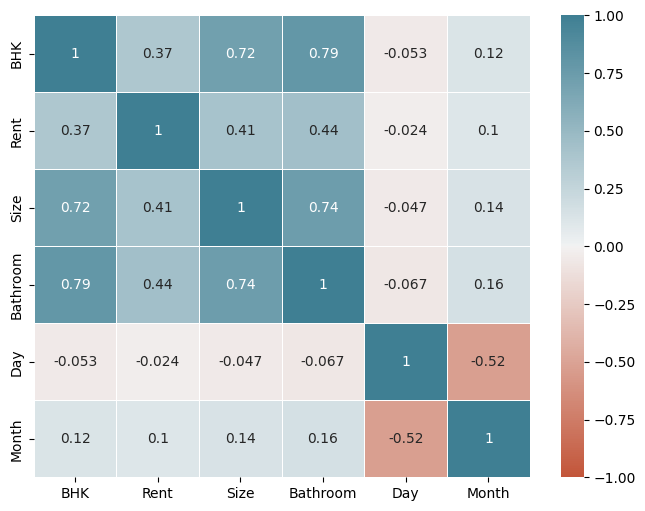

In [32]:
# Correlation matrix in heatmap
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(dataset[numerical_columns.columns.to_list()].corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)
plt.show()

### MultiCollineartiy test

In [33]:
# Checking multicollinearity using vif factor
def vif_factor(columns):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif["features"] = columns.columns
    vif["vif_factor"] = [variance_inflation_factor(columns.values, i) for i in range(columns.shape[1])]

    return vif.sort_values("vif_factor")

In [34]:
# vif matrix
display(vif_factor(dataset.select_dtypes(include=np.number)))

,features,vif_factor
1,Rent,1.511137
4,Day,3.061768
2,Size,8.284278
5,Month,8.611722
3,Bathroom,20.145176
0,BHK,21.324760


From correlation and multicollinearity test, it show there aren't any columns that needs to be dropped. Its seems BHK and Bathroom, BHK and size are somewhat correlated but lets check whether by keeping those all in model would give better result.

In [35]:
# For Categorical variable, using Cramer's V factor to test association
import scipy as ss
from scipy.stats import chi2_contingency

# Function to measure the association
def crammers_v(feature1: pd.DataFrame, feature2:pd.DataFrame) -> int:
    # cross table building
    crosstab = np.array(pd.crosstab(feature1, feature2, rownames=None, colnames=None))
    # Keeping the test statistics of the Chi2 test
    stat = chi2_contingency(crosstab)[0]
    n_obs = np.sum(crosstab)
    mini = min(crosstab.shape) - 1

    return (stat/(n_obs*mini))

In [36]:
# Creating a dataframe explaining association amongst all the categorical features
def create_association_matrix(categorical_cols: pd.DataFrame) -> pd.DataFrame:
    rows = []

    for feature1 in categorical_cols:
        col = []
        for feature2 in categorical_cols:
            # Cramer's V test
            cramers_value = crammers_v(categorical_cols[feature1], categorical_cols[feature2])
            col.append(round(cramers_value, 2))
        rows.append(col)

    cramers_results = np.array(rows)
    return pd.DataFrame(cramers_results, columns=categorical_cols.columns, index=categorical_cols.columns)

In [37]:
categorical_columns = dataset.select_dtypes(include=object)
categorical_columns

,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
1,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
2,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
3,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
4,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,Contact Owner
...,...,...,...,...,...,...,...
4741,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4742,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4743,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,Contact Agent
4744,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,Contact Agent


In [38]:
# Dropping rent as to test the association amongst the categorical independent variable only
association_result = create_association_matrix(categorical_columns)
print("Cramer's V association matrix:")
display(association_result)

Cramer's V association matrix:


,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
Floor,1.00,0.11,0.55,0.23,0.14,0.17,0.21
Area Type,0.11,1.00,0.58,0.08,0.00,0.07,0.16
Area Locality,0.55,0.58,1.00,1.00,0.55,0.57,0.50
City,0.23,0.08,1.00,1.00,0.04,0.02,0.15
Furnishing Status,0.14,0.00,0.55,0.04,1.00,0.01,0.01
Tenant Preferred,0.17,0.07,0.57,0.02,0.01,1.00,0.03
Point of Contact,0.21,0.16,0.50,0.15,0.01,0.03,1.00


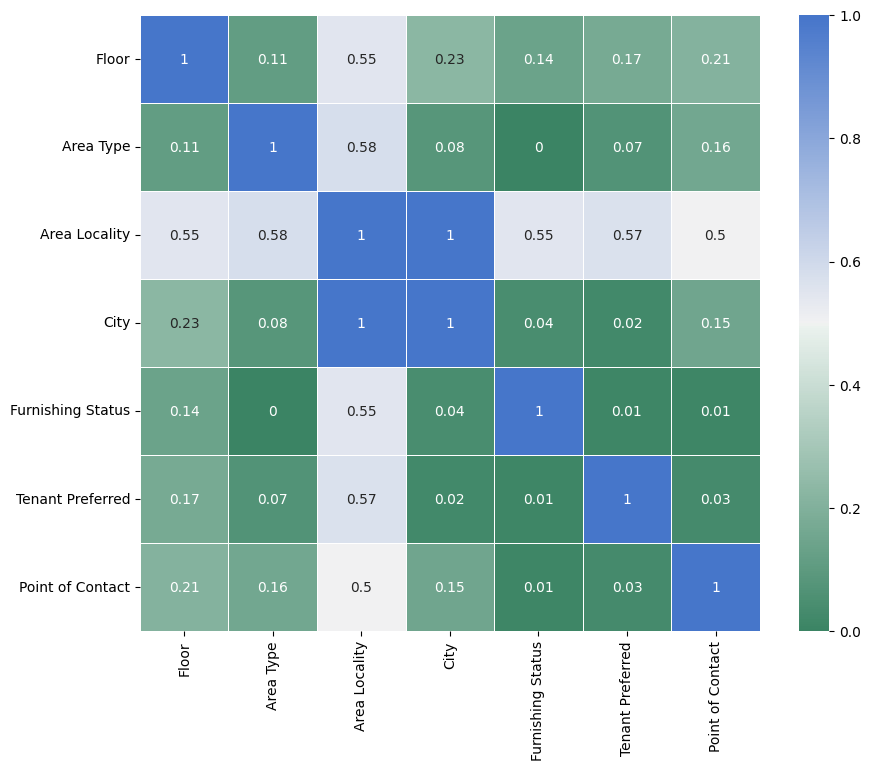

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(association_result, vmin=0, vmax=1, cmap=sns.diverging_palette(150, 255, as_cmap=True), annot=True, linewidths=.5)
plt.show()

#### There seems to have an association between city and area locality, so dropping area locality

In [40]:
association_result = create_association_matrix(categorical_columns.drop("Area Locality", axis=1))
print("Cramer's V association matrix:")
display(association_result)

Cramer's V association matrix:


,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Point of Contact
Floor,1.00,0.11,0.23,0.14,0.17,0.21
Area Type,0.11,1.00,0.08,0.00,0.07,0.16
City,0.23,0.08,1.00,0.04,0.02,0.15
Furnishing Status,0.14,0.00,0.04,1.00,0.01,0.01
Tenant Preferred,0.17,0.07,0.02,0.01,1.00,0.03
Point of Contact,0.21,0.16,0.15,0.01,0.03,1.00


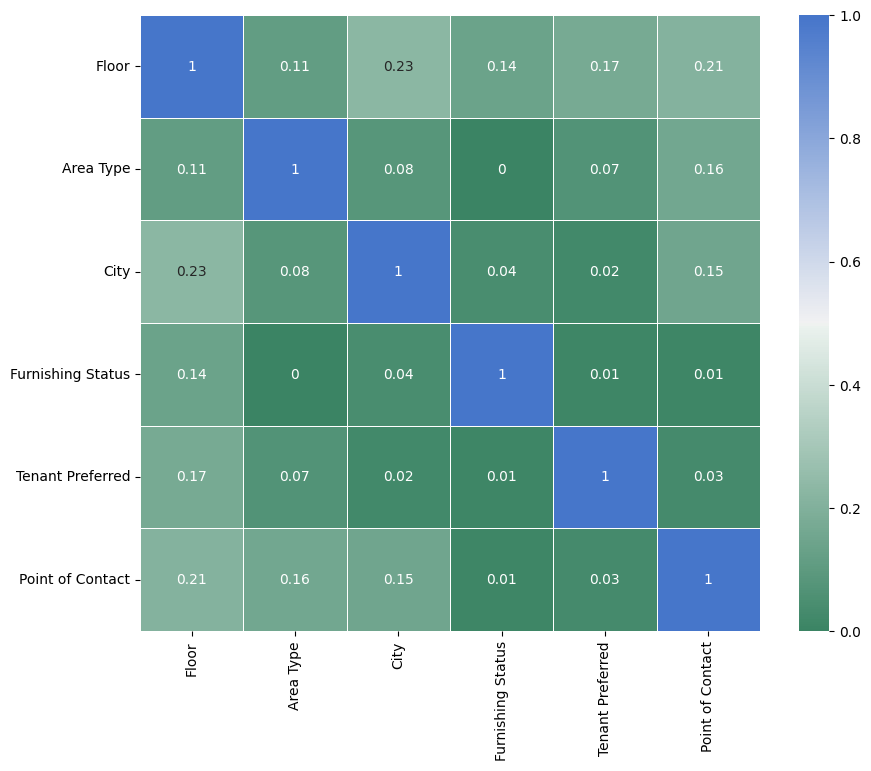

In [41]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(association_result, vmin=0, vmax=1, cmap=sns.diverging_palette(150, 255, as_cmap=True), annot=True, linewidths=.5)
plt.show()

In [42]:
dataset.drop("Area Locality", axis=1, inplace=True)

From the association test, it doesn't seem there exists any association amongst the categorical variables after removing area locality column.

## Multivariate Analysis

### Bivariate visualization between response variable and numerical variable

In [43]:
numerical_columns.drop("Rent", axis=1, inplace=True)

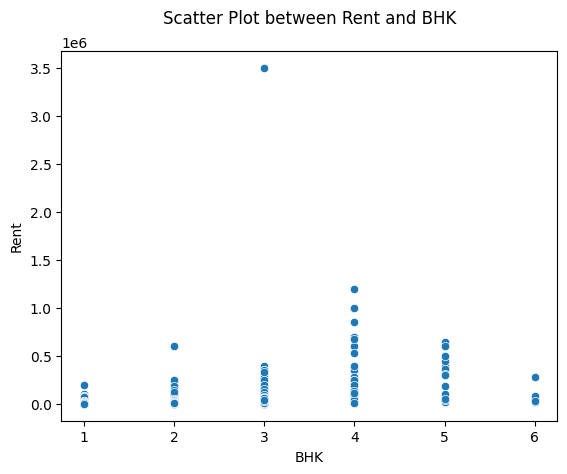

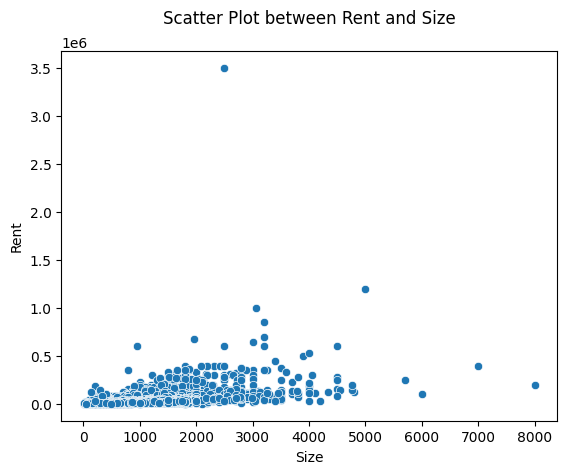

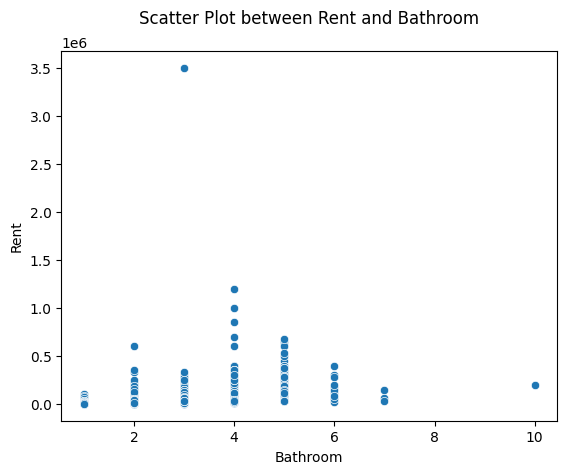

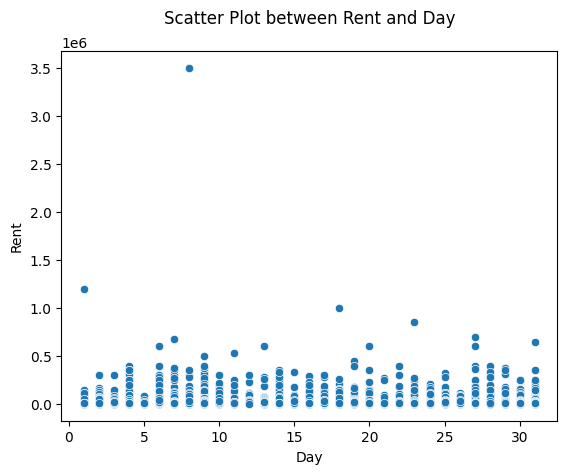

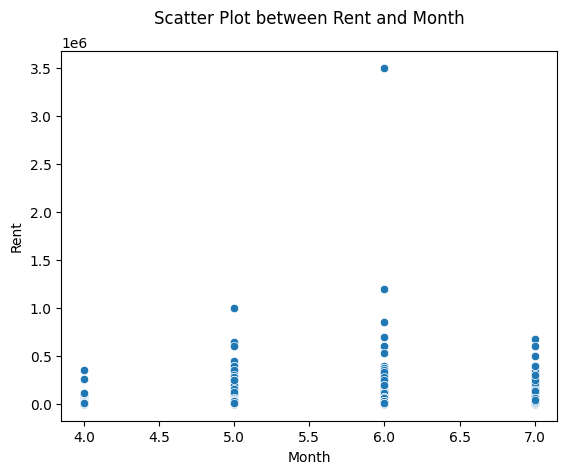

In [44]:
for column in numerical_columns.columns.to_list():
    # plt.figure(figsize=(8, 6))
    plt.title(f"Scatter Plot between Rent and {column}", pad=20)
    sns.scatterplot(data=dataset, x=column, y="Rent")
    plt.show()

### Bivariate visualization between response variable and categorical variable

In [45]:
categorical_columns.columns.to_list()

['Floor',
 'Area Type',
 'Area Locality',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Point of Contact']

In [46]:
import plotly.express as px

In [47]:
def box_plot(column1:str, column2:str, dataset: pd.DataFrame=dataset) -> None:
    fig = px.box(dataset, x=column1, y=column2, title=f"Boxplot between {column1} and {column2}")
    fig.show()

In [48]:
# boxplot between City and Rent
box_plot(dataset=dataset, column1="City", column2="Rent")

In [49]:
# boxplot between Area Type and Rent
box_plot(dataset=dataset, column1="Area Type", column2="Rent")

In [50]:
# boxplot between Area Type and Rent
box_plot(dataset=dataset, column1="Furnishing Status", column2="Rent")

In [51]:
# boxplot between Area Type and Rent
box_plot(dataset=dataset, column1="Tenant Preferred", column2="Rent")

In [52]:
# boxplot between Area Type and Rent
box_plot(dataset=dataset, column1="Point of Contact", column2="Rent")

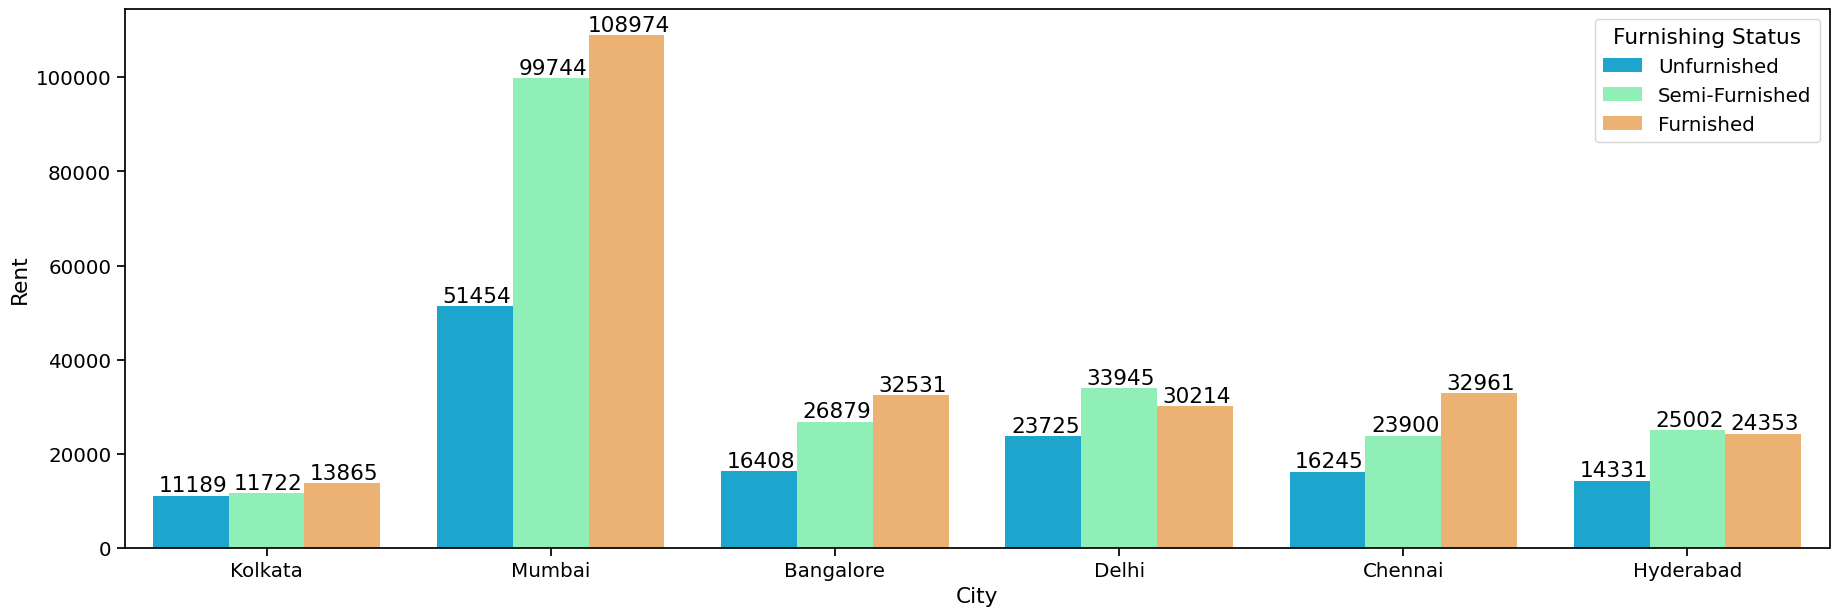

In [53]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(22, 7))
ax = sns.barplot(x=dataset['City'], 
                 y=dataset['Rent'],
                 hue = dataset['Furnishing Status'],
                 palette='rainbow',
                 ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.14, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

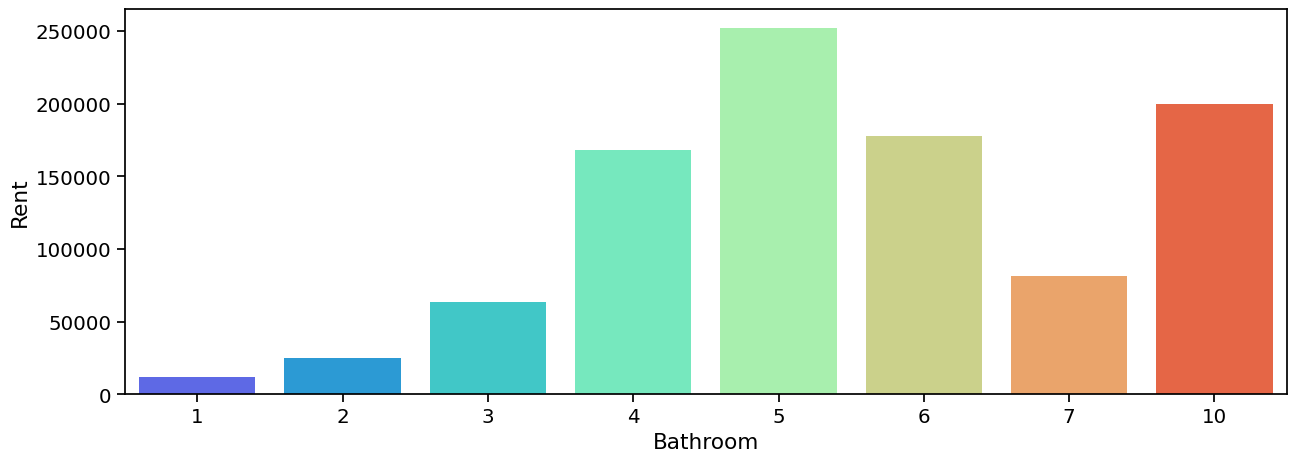

In [54]:
fig = plt.figure(figsize=(15, 5))
ax = sns.barplot(x=dataset['Bathroom'].sort_values(ascending=True), 
                 y=dataset['Rent'], 
                 palette='rainbow',
                 ci = None)
plt.ylabel('Rent');

In [56]:
# This dataset is being imported in preprocessing_and_feature_engineering file
%store dataset

Stored 'dataset' (DataFrame)


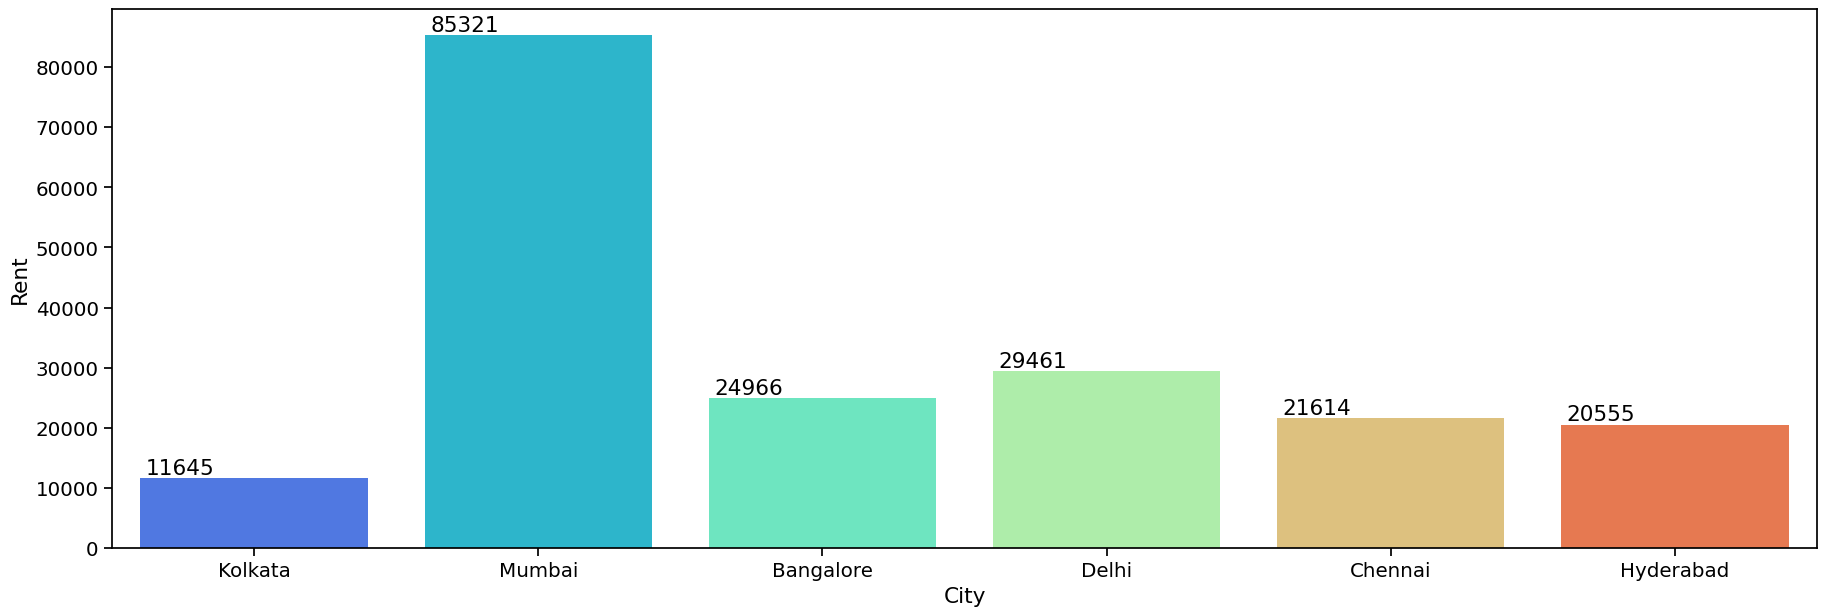

In [58]:
sns.set_context('notebook', font_scale = 1.3)
plt.figure(figsize=(22, 7))
ax = sns.barplot(x=dataset['City'], 
                 y=dataset['Rent'],
                 palette='rainbow',
                 ci = None)
plt.ylabel('Rent');

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.14, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'Black')

<AxesSubplot:xlabel='Size', ylabel='Rent'>

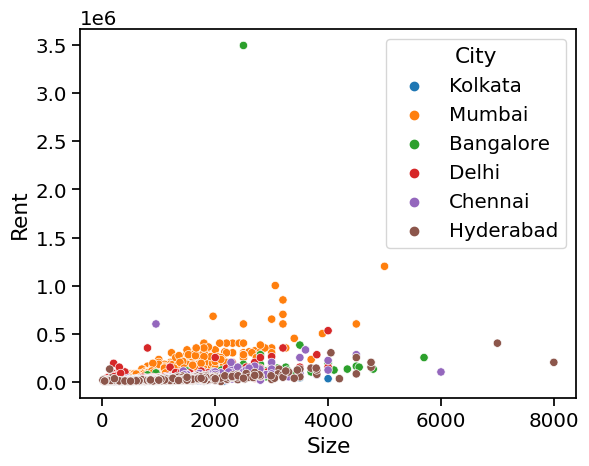

In [60]:

sns.scatterplot(data=dataset, x="Size", y="Rent", hue="City")

<AxesSubplot:xlabel='Bathroom', ylabel='count'>

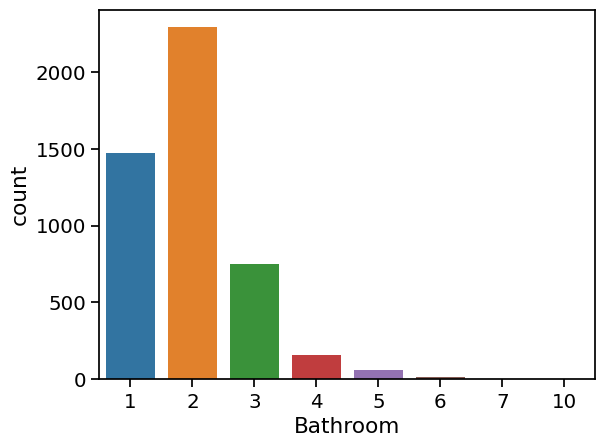

In [74]:

sns.countplot(data=dataset, x="Bathroom")